In [28]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Jonathan Lee

Student ID: 508715

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [29]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
data = pd.read_csv("./utility/data/rideshare_kaggle.csv")
print(f"examples: {data.shape[0]} features: {data.shape[1]}")
data.head()

examples: 693071 features: 57


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## 1-1 Get Unique Features

In [31]:
data.T
data.nunique(axis=0)

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## 1-2 Get Data Type

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## 1-3 Get Correlation

In [33]:
int_data = data.select_dtypes(include=[np.number])
int_data.corr()['price'].sort_values(ascending=True)

moonPhase                     -0.001602
longitude                     -0.001417
windBearing                   -0.001382
humidity                      -0.001238
day                           -0.000722
dewPoint                      -0.000615
apparentTemperatureMin        -0.000580
temperatureMax                -0.000550
temperatureHigh               -0.000516
temperatureMin                -0.000428
uvIndex                       -0.000424
apparentTemperatureMax        -0.000290
apparentTemperatureHigh       -0.000261
precipProbability             -0.000243
apparentTemperature           -0.000193
temperature                   -0.000084
precipIntensity                0.000166
temperatureLow                 0.000182
ozone                          0.000460
hour                           0.000561
apparentTemperatureHighTime    0.000741
apparentTemperatureMaxTime     0.000746
temperatureLowTime             0.000754
temperatureHighTime            0.000759
sunriseTime                    0.000760


### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

Based on the correlation that we calculated, we can drop all the features that show an evident negative correlation with the feature 'price.' Additionally, there are features like 'ID' that provide vague information that doesn't necessarily impact the price of uber/lyft rides and 'datetime' that requires a massive array to store all the corresponding information. 


In [34]:
#Drop Unnecessary Features
data = data.drop(['moonPhase', 'longitude', 'windBearing', 
                  'humidity', 'day', 'dewPoint', 'apparentTemperatureMin',
                  'temperatureMax','temperatureHigh','temperatureMin','uvIndex',
                  'apparentTemperatureMax','apparentTemperatureHigh', 'precipProbability', 
                  'apparentTemperature', 'temperature', 'id', 'datetime'], axis=1)
data.head()
data.shape

(693071, 39)

## 2-1 Drop NA and Duplicate Data

In [35]:
data.dropna(axis=0, inplace=True)
print(f"\nShape of data after removing missing data: {data.shape}")


Shape of data after removing missing data: (637976, 39)


In [36]:
data.drop_duplicates(inplace=True)
print(f"\nShape of data after removing missing data: {data.shape}")


Shape of data after removing missing data: (636929, 39)


## 2-2 Get Rid of Outliers

Text(0, 0.5, 'Frequency')

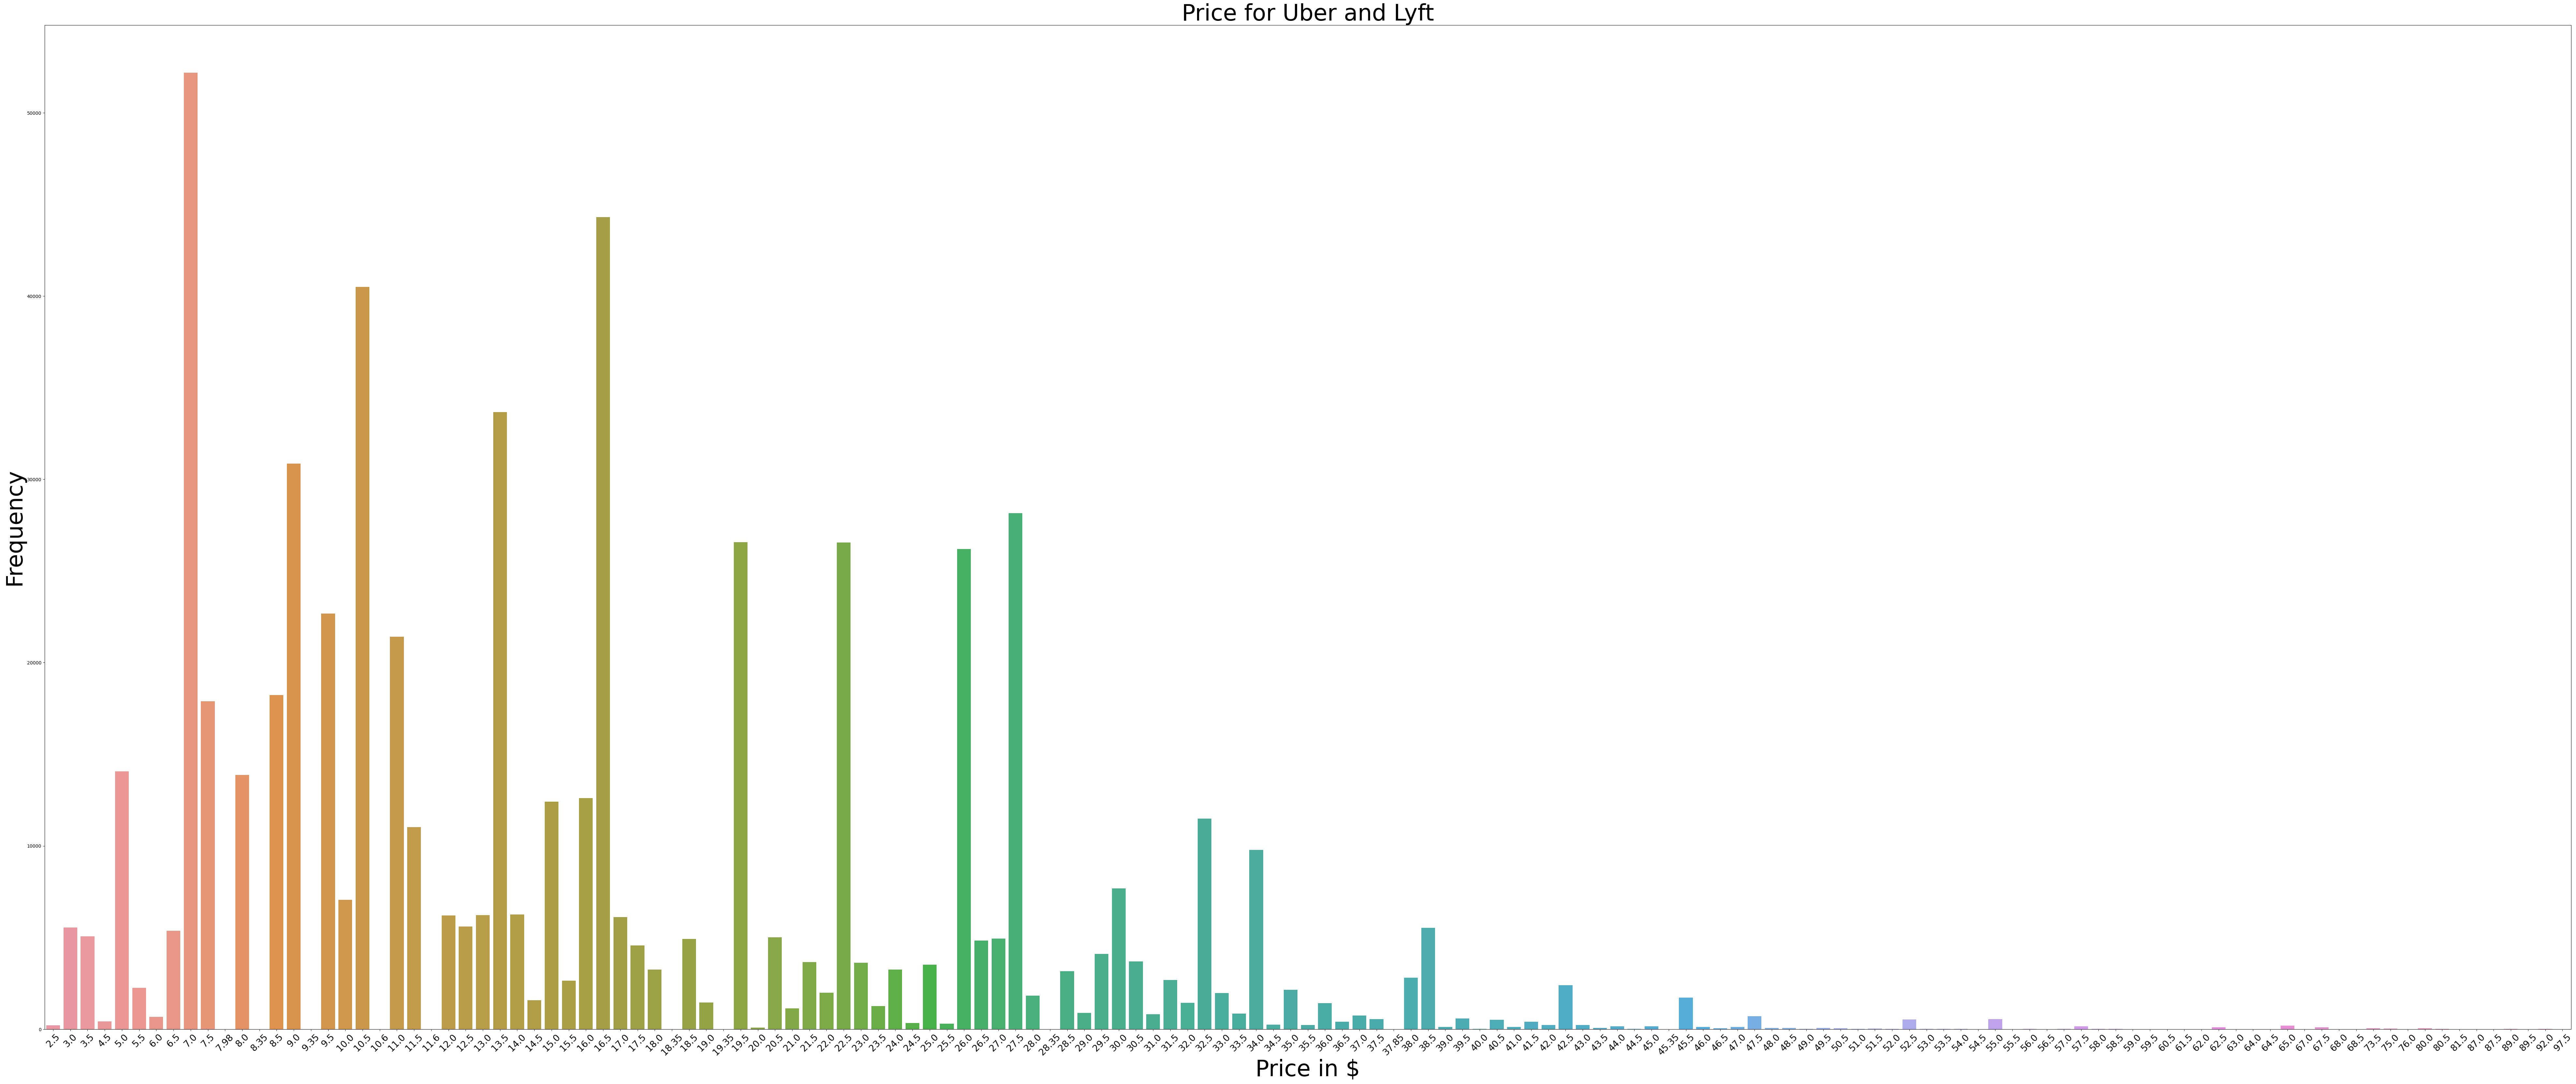

In [37]:
f, axes = plt.subplots(1, figsize=(100,40))
plt.xticks(rotation = 45, fontsize=20)
graph = sns.countplot(x=data['price'])

plt.title('Price for Uber and Lyft', fontsize=50)
plt.xlabel('Price in $', fontsize=50)
plt.ylabel('Frequency', fontsize=50)


## It can be seen that the price > ~43 can be considered as the outlier cut off, but we can calculate it. 

Text(0, 0.5, 'Frequency')

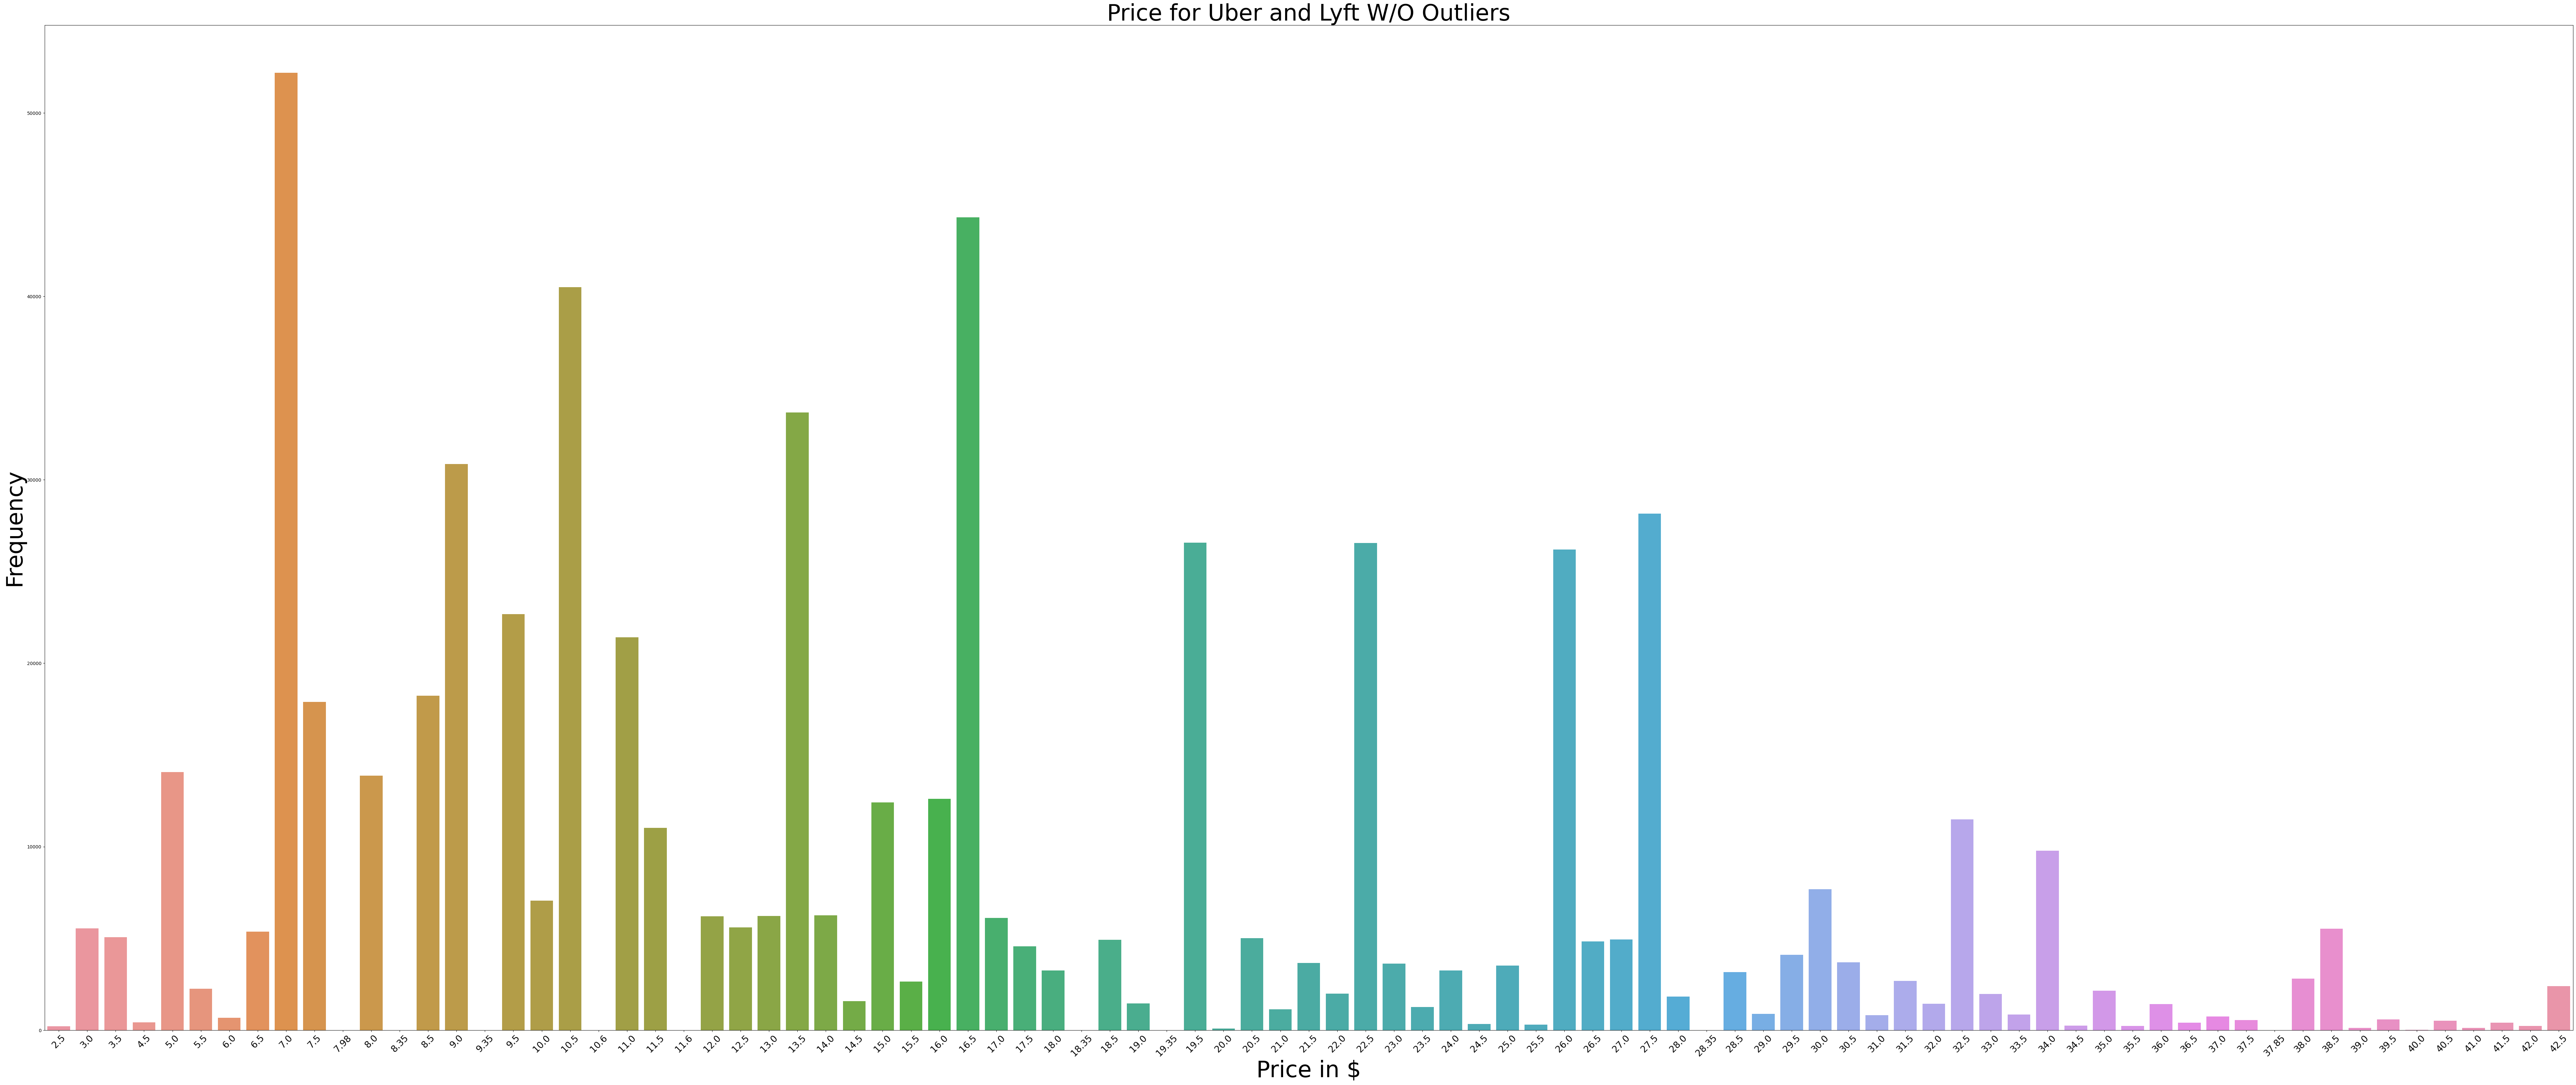

In [38]:
new_data = data.copy()
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Q1−1.5×IQR,Q3+1.5×IQR

lower_bound = Q1_price - (1.5 * IQR_price)
upper_bound = Q3_price + (1.5 * IQR_price)

#Get rid of prices not included in the bounds
no_outlier_data = new_data[(new_data['price'] >= lower_bound) & (new_data['price'] <= upper_bound)]

#Graph New Result
f, axes = plt.subplots(1, figsize=(100,40))
plt.xticks(rotation = 45, fontsize=20)
graph = sns.countplot(x=no_outlier_data['price'])

plt.title('Price for Uber and Lyft W/O Outliers', fontsize=50)
plt.xlabel('Price in $', fontsize=50)
plt.ylabel('Frequency', fontsize=50)


## 2-3 Split Uber and Lyft Data

In [39]:
uber_data = no_outlier_data[no_outlier_data['cab_type'] == 'Uber']
uber_data.shape

(328276, 39)

In [40]:
uber_data

,timestamp,hour,month,timezone,source,destination,cab_type,product_id,name,price,...,visibility.1,ozone,sunriseTime,sunsetTime,precipIntensityMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
12,1.543616e+09,22,11,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,...,9.833,281.8,1543578867,1543612470,0.0003,1543593600,1543579200,1543600800,1543575600,1543611600
13,1.544698e+09,10,12,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,...,9.831,327.3,1544702792,1544735599,0.0001,1544716800,1544688000,1544731200,1544688000,1544734800
14,1.544729e+09,19,12,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,...,9.959,330.8,1544702792,1544735599,0.0001,1544716800,1544688000,1544731200,1544688000,1544734800
15,1.545005e+09,23,12,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,...,4.054,325.3,1544962119,1544994839,0.1252,1544979600,1544954400,1544990400,1545019200,1544986800
16,1.544748e+09,0,12,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,...,10.000,326.7,1544702792,1544735599,0.0001,1544716800,1544688000,1544731200,1544688000,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.543708e+09,23,12,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,...,9.785,271.5,1543665331,1543698855,0.0000,1543683600,1543658400,1543690800,1543658400,1543690800
693066,1.543708e+09,23,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,...,9.785,271.5,1543665331,1543698855,0.0000,1543683600,1543658400,1543690800,1543658400,1543690800
693067,1.543708e+09,23,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,...,9.785,271.5,1543665331,1543698855,0.0000,1543683600,1543658400,1543690800,1543658400,1543690800
693069,1.543708e+09,23,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,...,9.785,271.5,1543665331,1543698855,0.0000,1543683600,1543658400,1543690800,1543658400,1543690800


In [41]:
lyft_data = no_outlier_data[no_outlier_data['cab_type'] == 'Lyft']
lyft_data.shape

(303065, 39)

In [42]:
lyft_data

,timestamp,hour,month,timezone,source,destination,cab_type,product_id,name,price,...,visibility.1,ozone,sunriseTime,sunsetTime,precipIntensityMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,1.544953e+09,9,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,10.000,303.8,1544962084,1544994864,0.1276,1544979600,1545012000,1544968800,1545012000,1544958000
1,1.543284e+09,2,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,4.786,291.1,1543232969,1543266992,0.1300,1543251600,1543233600,1543251600,1543291200,1543251600
2,1.543367e+09,1,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,10.000,315.7,1543319437,1543353364,0.1064,1543338000,1543377600,1543320000,1543377600,1543320000
3,1.543554e+09,4,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,10.000,291.1,1543492370,1543526114,0.0000,1543507200,1543550400,1543510800,1543550400,1543510800
4,1.543463e+09,3,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,10.000,347.7,1543405904,1543439738,0.0001,1543420800,1543402800,1543420800,1543392000,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,1.543453e+09,1,11,America/New_York,Theatre District,Fenway,Lyft,lyft_plus,Lyft XL,16.5,...,9.915,349.9,1543405936,1543439716,0.0000,1543420800,1543399200,1543438800,1543399200,1543438800
693043,1.543453e+09,1,11,America/New_York,Theatre District,Fenway,Lyft,lyft_premier,Lux,22.5,...,9.915,349.9,1543405936,1543439716,0.0000,1543420800,1543399200,1543438800,1543399200,1543438800
693048,1.543456e+09,1,11,America/New_York,Theatre District,Fenway,Lyft,lyft_line,Shared,7.0,...,9.915,349.9,1543405936,1543439716,0.0000,1543420800,1543399200,1543438800,1543399200,1543438800
693051,1.543456e+09,1,11,America/New_York,Theatre District,Fenway,Lyft,lyft,Lyft,10.5,...,9.915,349.9,1543405936,1543439716,0.0000,1543420800,1543399200,1543438800,1543399200,1543438800


We cleaned the data by getting rid of duplicates and N/A entries; we then split the data and decided that price is the appropriate 'target' for our analysis as it accounts for the economic spending for a uber/lyft ride

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

## 3-1 Correlation HeatMaps

We generated a heatmap to visualize the correlation of temperature features with price.

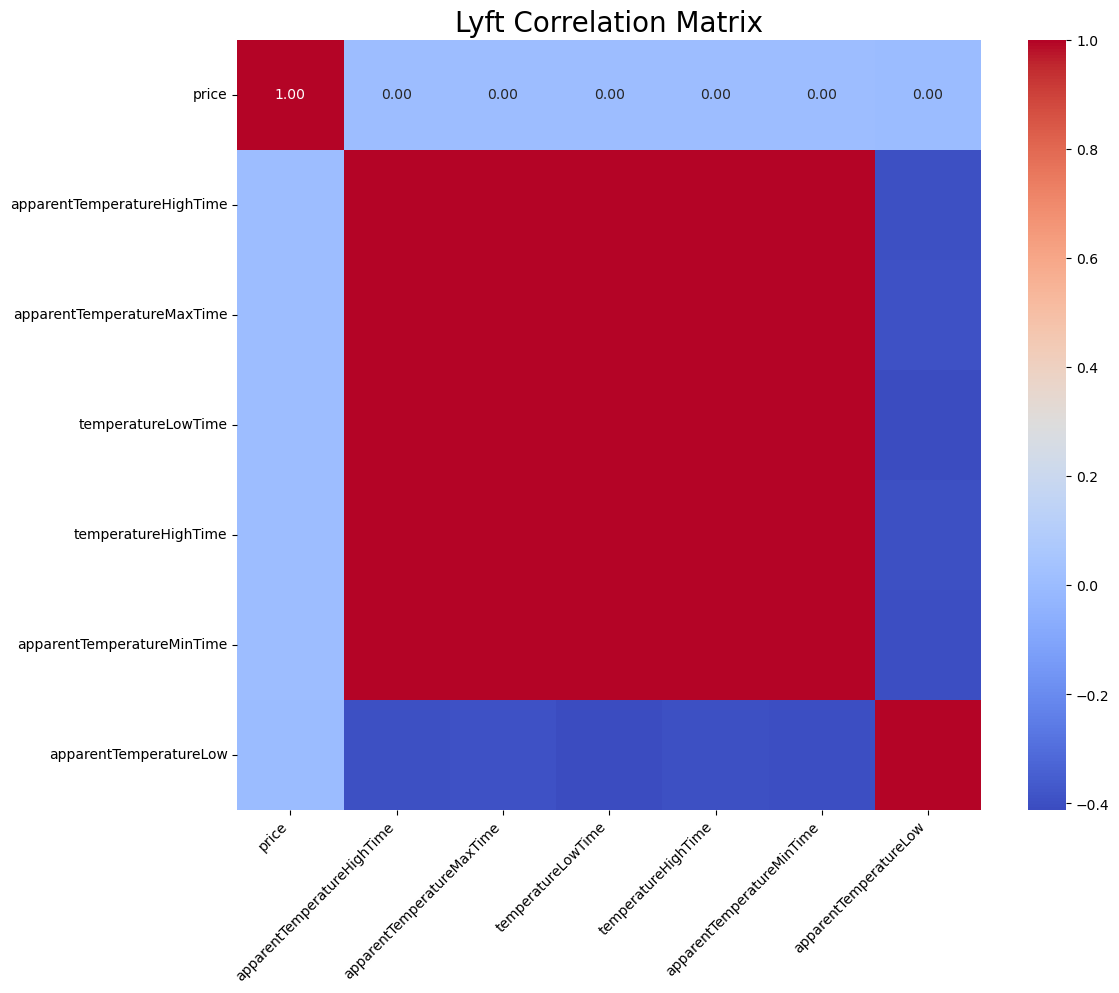

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

climate_cols = ['price', 'apparentTemperatureHighTime', 'apparentTemperatureMaxTime',
                'temperatureLowTime', 'temperatureHighTime', 'apparentTemperatureMinTime',
                'apparentTemperatureLow']

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(lyft_data[climate_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Lyft Correlation Matrix', fontsize=20)
plt.show()

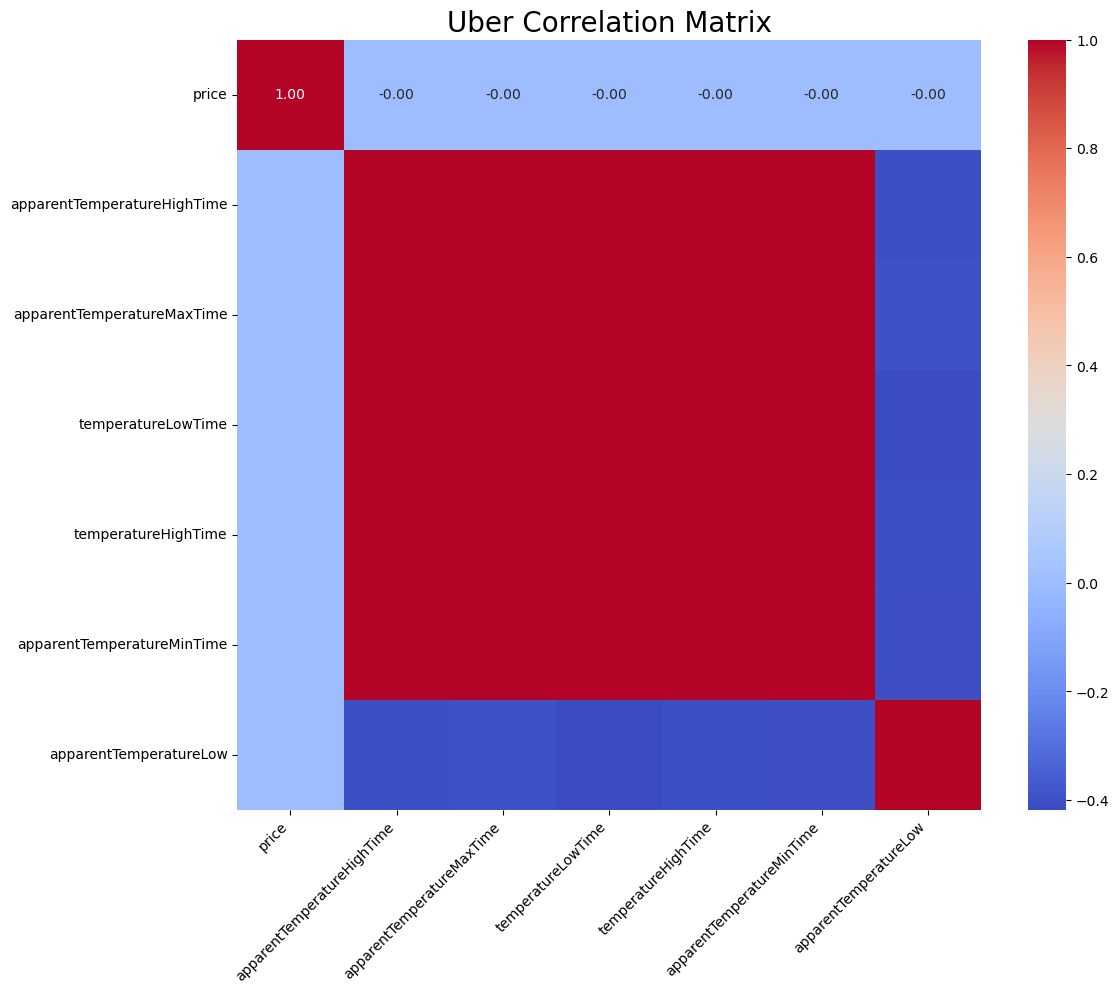

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

climate_cols = ['price', 'apparentTemperatureHighTime', 'apparentTemperatureMaxTime',
                'temperatureLowTime', 'temperatureHighTime', 'apparentTemperatureMinTime',
                'apparentTemperatureLow']

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(uber_data[climate_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Uber Correlation Matrix', fontsize=20)
plt.show()

The two heatmaps are pretty similar in pattern, which means that the two companies tend to operate on a similar basis. Also, there is no apparent correlation of any of the cateogires with price.

## 3-2 Price comparison for the two companies

In [21]:
f, axes = plt.subplots(2, figsize=(150,80), sharex=True , sharey=True)

plt.xticks(rotation = 90,  fontsize=60)
lyftP = sns.countplot(x=lyft_data['price'], ax=axes[0])
lyftP.set_xlabel("Lyft price in $", fontsize = 90)
lyftP.tick_params(labelbottom=True)
lyftP.set_ylabel("Counts", fontsize = 30)

plt.xticks(rotation=90, fontsize=60)
uberP = sns.countplot(x=uber_data['price'], ax=axes[1])
uberP.set_xlabel("Uber price in $", fontsize = 90)
uberP.set_ylabel("Counts", fontsize = 30)


print("Lyft : ", len(lyft_data), ", Uber :", len(uber_data))

Lyft :  303065 , Uber : 328276


We can see that in general, uber marks for more entries of higher prices than lyft.

## 3-3 Visualization of Ride Types

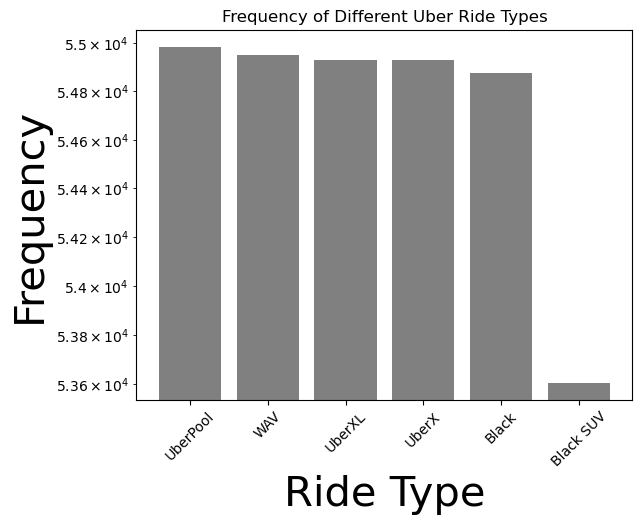

In [22]:
# Count the frequency of each Uber ride type
name_counts = uber_data['name'].value_counts()

# Plot histogram of the frequency of Lyft ride types
plt.yscale('log')
plt.bar(name_counts.index, name_counts.values, color = 'grey')
plt.title("Frequency of Different Uber Ride Types")
plt.xlabel("Ride Type", fontsize = 30)
plt.ylabel("Frequency", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

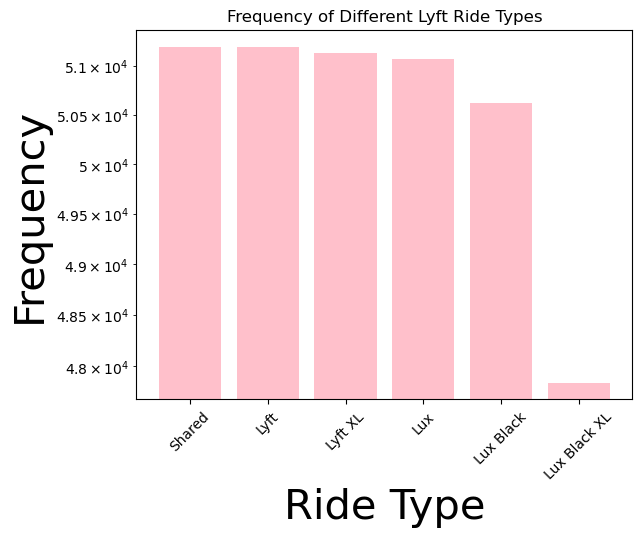

In [23]:
# Count the frequency of each Lyft ride type
name_counts = lyft_data['name'].value_counts()

# Plot histogram of the frequency of Lyft ride types
plt.yscale('log')
plt.bar(name_counts.index, name_counts.values, color = 'pink')
plt.title("Frequency of Different Lyft Ride Types")
plt.xlabel("Ride Type", fontsize = 30)
plt.ylabel("Frequency", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

## 3-4 Ride Type & Price
With distance marking the highest correlation with price from our calculation at 1-3, we decided to visualize the difference between uber and lyft based on distance

<Axes: title={'center': 'Price vs Ride Type for Uber'}, xlabel='name', ylabel='price'>

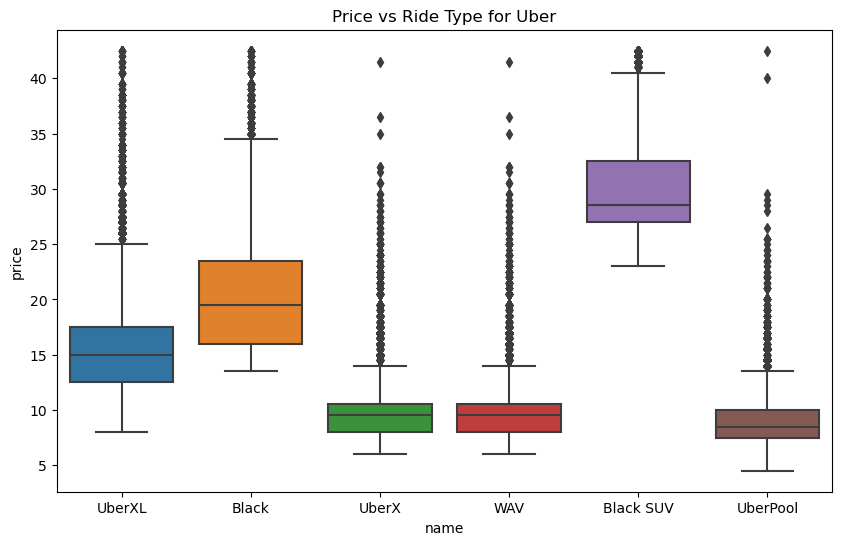

In [63]:
## For uber
plt.figure(figsize=(10,6))
plt.title("Price vs Ride Type for Uber")
sns.boxplot(x='name', y='price',data=uber_data)

<Axes: title={'center': 'Price vs Ride Type for Lyft'}, xlabel='name', ylabel='price'>

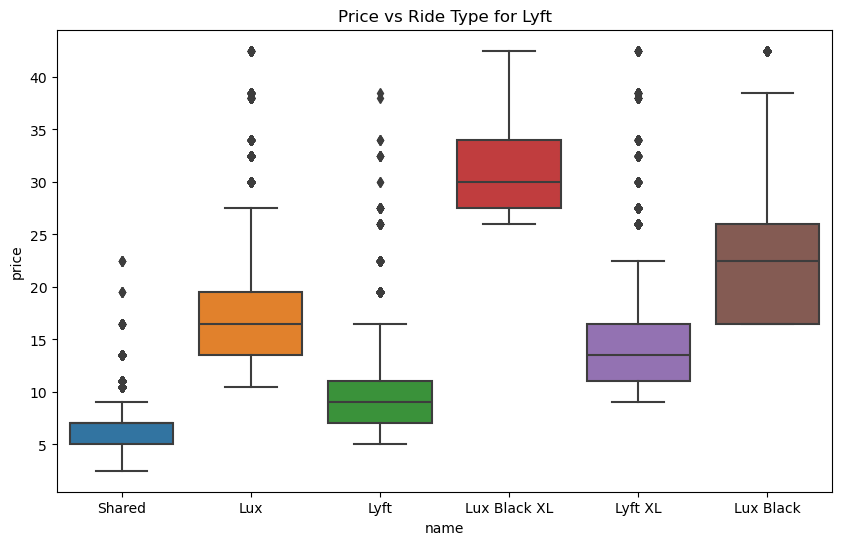

In [35]:
## For Lyft

plt.figure(figsize=(10,6))
plt.title("Price vs Ride Type for Lyft")
sns.boxplot(x='name', y='price',data=lyft_data)

## 3-5 Distance vs Price

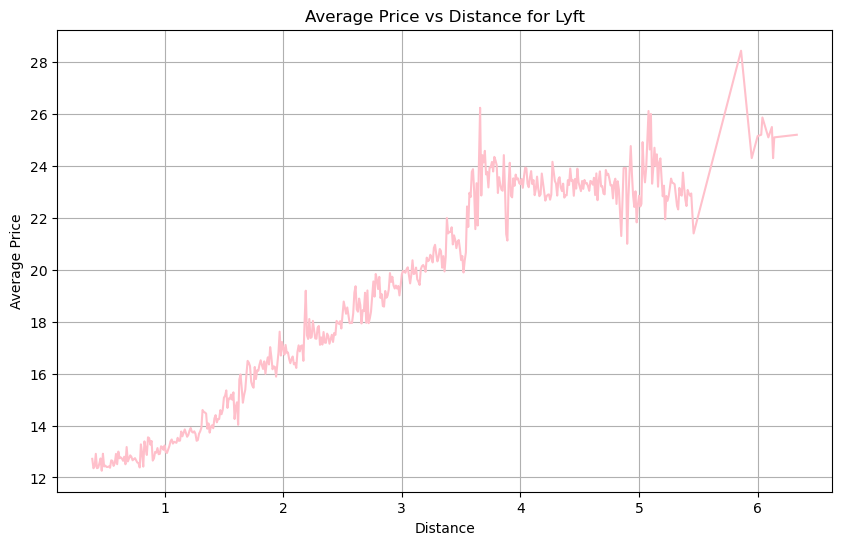

In [61]:
import matplotlib.pyplot as plt

# Group Lyft data by 'distance' and calculate mean price for each distance interval
avg_price_by_distance = lyft_data.groupby('distance')['price'].mean()

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_distance.index, avg_price_by_distance.values, color= 'pink')
plt.title("Average Price vs Distance for Lyft")
plt.xlabel("Distance")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

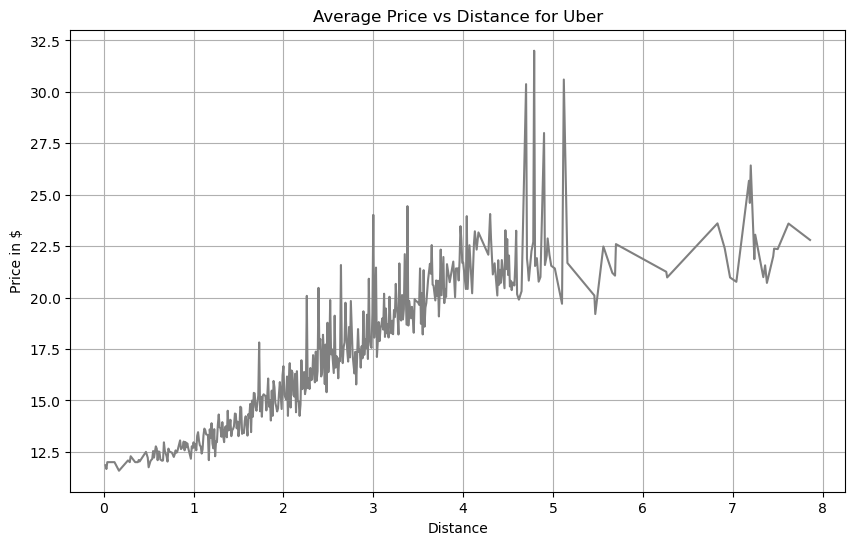

In [64]:
# Group Uber data by 'distance' and calculate mean price for each distance interval
avg_price_by_distance = uber_data.groupby('distance')['price'].mean()

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_distance.index, avg_price_by_distance.values, 'gray')
plt.title("Average Price vs Distance for Uber")
plt.xlabel("Distance")
plt.ylabel("Price in $")
plt.grid(True)
plt.show()

some points to talk about: distance and price are positively correlated; prices are obviously higher when vehcile size is black, XL, or both, and people tend to take the typical (default) vehicle, perhaps due to price; uber prices are tend to be more expensive; there isn't a strong correlation between temperature and price and other numerical features in the correlation. 

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** (feel free to make multiple cells!)

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

In [ ]:
# woah! these things are falling from the sky or something

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:** (feel free to make multiple cells!)

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. Be sure to add your partner to the submission as well.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.

In [ ]:
grader.check("hw6")

<!-- END QUESTION -->

